In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

humidity = pd.read_csv('archive/humidity.csv')
pressure = pd.read_csv('archive/pressure.csv')
temperature = pd.read_csv('archive/temperature.csv')
weather_description = pd.read_csv('archive/weather_description.csv')
wind_direction = pd.read_csv('archive/wind_direction.csv')
wind_speed = pd.read_csv('archive/wind_speed.csv')
print('Setup complete')

Setup complete


In [2]:
#Data exploration:
# - I plan to only use one city from the datasets and concatinate them together, because otherwise the dataset would 
#   ... be too big

In [3]:
dataframes = [humidity, 'humidity', pressure, 'pressure', temperature, 'temperature', weather_description, 'weather_description', wind_direction, 'wind_direction', wind_speed, 'wind_speed']

for i in range(0, len(dataframes), 2):
    print(dataframes[i].shape)

(45253, 37)
(45253, 37)
(45253, 37)
(45253, 37)
(45253, 37)
(45253, 37)


In [38]:
humidity.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [39]:
#missing data:
for i in range(0, len(dataframes), 2):
    print("Dataset: ", dataframes[i + 1])
    print(dataframes[i].isnull().sum().sort_values(ascending=False))
    print("")
    
#conclusion: Seattle is a nice choice - few missing values and I believe the weather there is quite varied anyways.

Dataset:  humidity
Vancouver            1826
Denver               1808
Montreal             1696
New York             1624
Phoenix              1308
Saint Louis          1289
Tel Aviv District    1113
Chicago              1109
Miami                1087
Eilat                 970
San Francisco         942
Jerusalem             906
Detroit               862
Beersheba             859
Las Vegas             842
Haifa                 818
Nahariyya             817
Toronto               728
Albuquerque           710
Indianapolis          695
Philadelphia          624
Charlotte             589
Nashville             567
San Antonio           564
Pittsburgh            522
Kansas City           512
Minneapolis           510
Portland              449
Boston                449
Atlanta               422
San Diego             344
Dallas                319
Seattle               289
Jacksonville          209
Los Angeles           152
Houston               121
datetime                0
dtype: int64

Datas

In [4]:
#joined all the datasets to get a better overview of all the data
all_dataframes = humidity
for i in range(2, len(dataframes), 2):
    all_dataframes = all_dataframes.join(dataframes[i], lsuffix='_' + dataframes[i-1], rsuffix='_' + dataframes[i+1])

In [5]:
for x in all_dataframes.columns.tolist():
    print(x)

datetime_humidity
Vancouver_humidity
Portland_humidity
San Francisco_humidity
Seattle_humidity
Los Angeles_humidity
San Diego_humidity
Las Vegas_humidity
Phoenix_humidity
Albuquerque_humidity
Denver_humidity
San Antonio_humidity
Dallas_humidity
Houston_humidity
Kansas City_humidity
Minneapolis_humidity
Saint Louis_humidity
Chicago_humidity
Nashville_humidity
Indianapolis_humidity
Atlanta_humidity
Detroit_humidity
Jacksonville_humidity
Charlotte_humidity
Miami_humidity
Pittsburgh_humidity
Toronto_humidity
Philadelphia_humidity
New York_humidity
Montreal_humidity
Boston_humidity
Beersheba_humidity
Tel Aviv District_humidity
Eilat_humidity
Haifa_humidity
Nahariyya_humidity
Jerusalem_humidity
datetime_pressure
Vancouver_pressure
Portland_pressure
San Francisco_pressure
Seattle_pressure
Los Angeles_pressure
San Diego_pressure
Las Vegas_pressure
Phoenix_pressure
Albuquerque_pressure
Denver_pressure
San Antonio_pressure
Dallas_pressure
Houston_pressure
Kansas City_pressure
Minneapolis_pressur

In [7]:
#do something with all the data together...

In [5]:
#find all columns containing Seattle data:
seattle_cols = [col for col in all_dataframes.columns if 'Seattle' in col]

#make Seattle dataframe:
seattle_df = all_dataframes[seattle_cols]
seattle_df.insert(0, 'datetime', humidity['datetime'])
seattle_df.head()

#- should drop the first row of all columns

,datetime,Seattle_humidity,Seattle_pressure,Seattle_temperature,Seattle_weather_description,Seattle_wind_direction,Seattle_wind_speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,81.0,1027.0,281.800000,sky is clear,0.0,0.0
2,2012-10-01 14:00:00,80.0,1027.0,281.797217,sky is clear,2.0,0.0
3,2012-10-01 15:00:00,80.0,1028.0,281.789833,sky is clear,10.0,0.0
4,2012-10-01 16:00:00,79.0,1028.0,281.782449,sky is clear,17.0,0.0


In [7]:
seattle_df.Seattle_weather_description.value_counts()

sky is clear                    12801
light rain                       7162
overcast clouds                  6176
broken clouds                    4659
mist                             3686
scattered clouds                 2875
few clouds                       2115
moderate rain                    1968
light intensity drizzle          1616
fog                               716
haze                              572
heavy intensity rain              505
smoke                             175
light snow                         66
light intensity shower rain        65
proximity thunderstorm             25
very heavy rain                    18
drizzle                            16
thunderstorm                        7
thunderstorm with light rain        6
heavy intensity drizzle             6
heavy snow                          4
snow                                4
shower rain                         2
thunderstorm with heavy rain        2
thunderstorm with rain              2
heavy intens

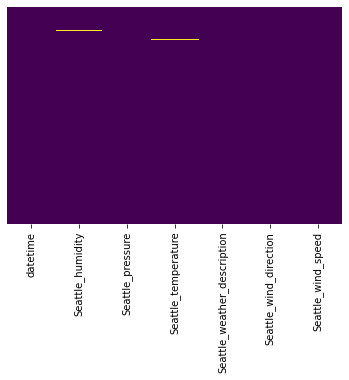

In [6]:
import seaborn as sns
sns.heatmap(seattle_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
#the heatmap shows very little null-values because there are so few relative to the amount of total values

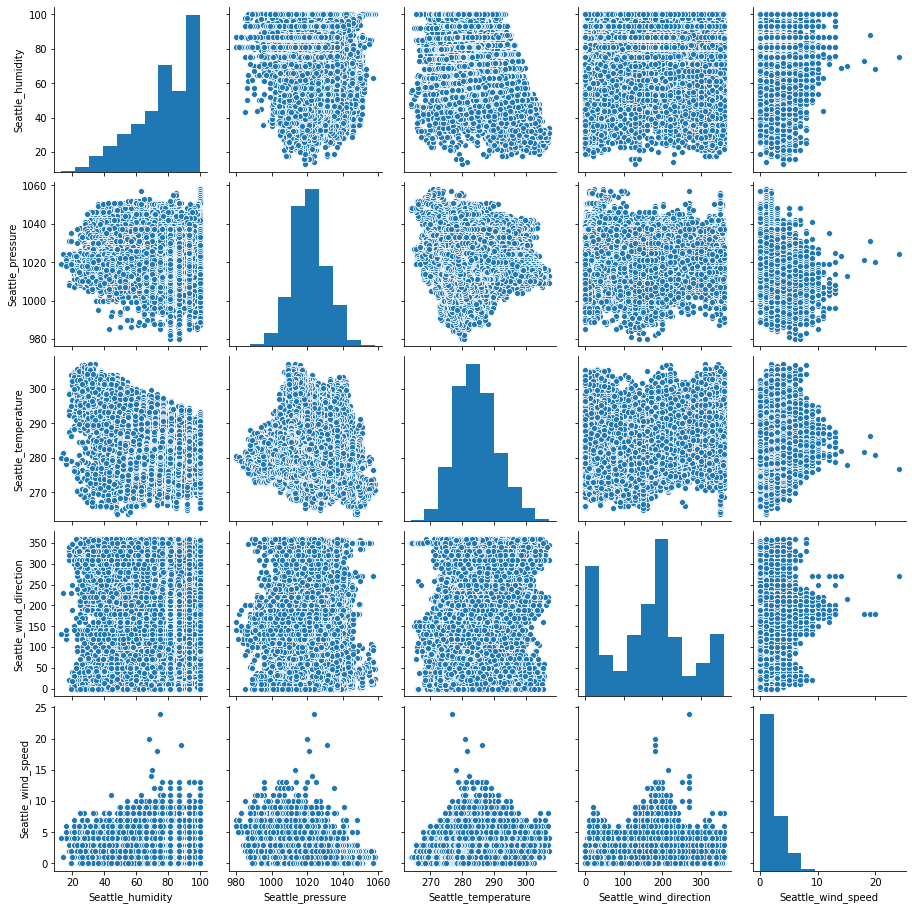

In [10]:
#Pair plotting to see relationship between the variables
sns.pairplot(seattle_df)

#conclusion: the distirbution is fairly even except for the 'Seattle_wind_speed' column - might be worth exploring later

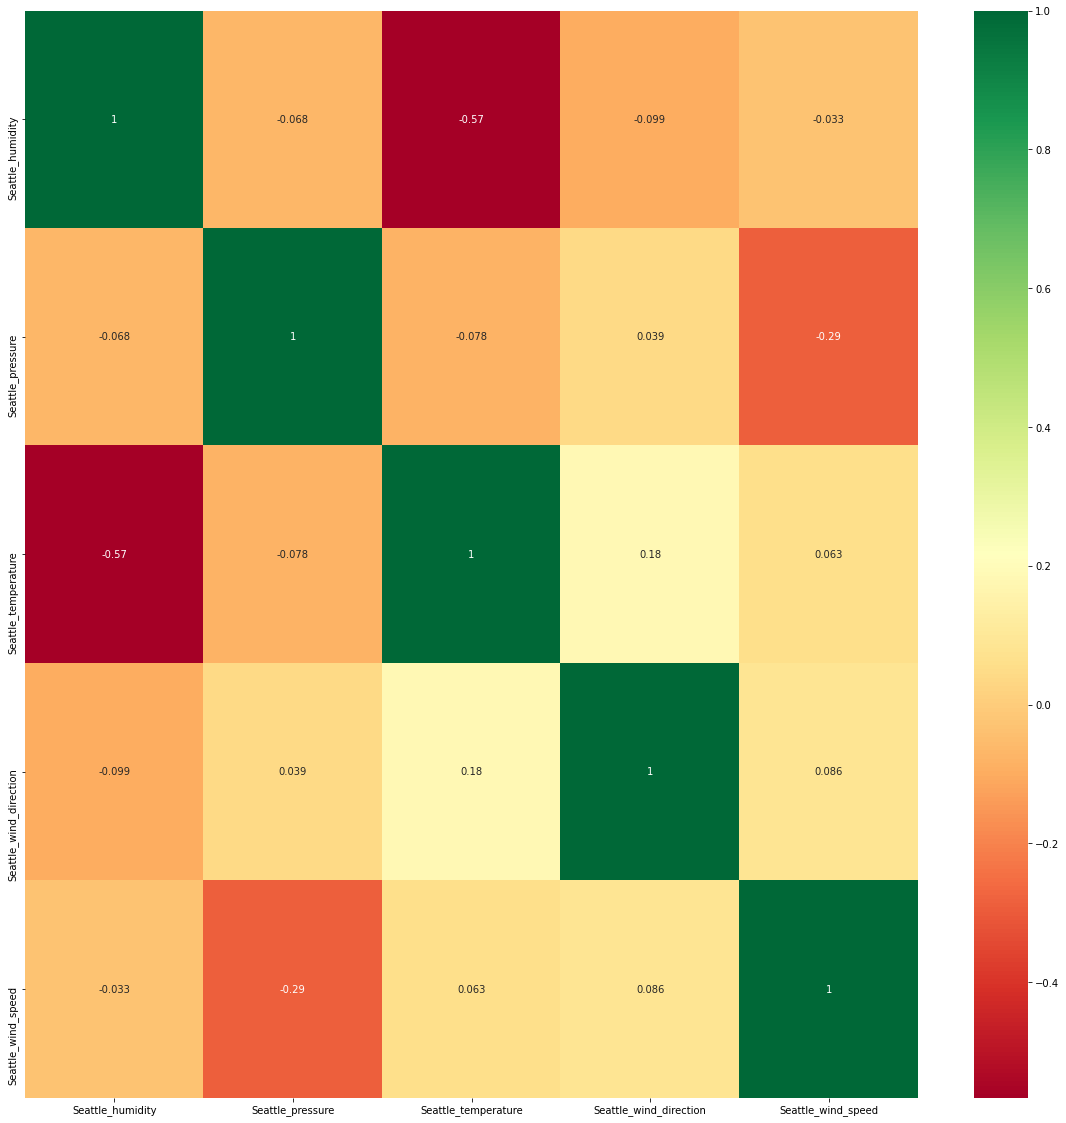

In [13]:
#seattle_df heatmap
corrmat=seattle_df.corr() #the corrilating features of seattle_df
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plotting the heatmap
hm = sns.heatmap(seattle_df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

#conclusion: not any great correlations... might be bad for model performance

In [6]:
#Feature engineering / data preprocessing:
# - Will only feature engineer the null-values (imputing) and find a representation for the date-values
#   - can impute seattle_humidity by looking at correlation with weather_description (idea)

#start by removing the first row
seattle_df.drop([0,0], inplace = True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
#Missing data Seattle:
total_missing = seattle_df.isnull().sum().sort_values(ascending=False)
percent = (seattle_df.isnull().sum()/seattle_df.isnull().count().sort_values(ascending=False))
missing_data_seattle = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data_seattle.head(10)

#Conclusion: we can definietly drop the rows with 2 and 12 NaN in 'Seattle_temperature' and 'Seattle_pressure'...
#... however, we will have to use imputation for 'Seattle_humidity'

,Total,Percent
Seattle_humidity,288,0.006364
Seattle_pressure,12,0.000265
Seattle_temperature,2,0.000044
Seattle_wind_speed,0,0.000000
Seattle_wind_direction,0,0.000000
Seattle_weather_description,0,0.000000
datetime,0,0.000000


In [8]:
#removing rows with NaN from the dataset
seattle_df = seattle_df[seattle_df['Seattle_temperature'].notna()]
seattle_df = seattle_df[seattle_df['Seattle_pressure'].notna()]

In [9]:
seattle_df.head()

,datetime,Seattle_humidity,Seattle_pressure,Seattle_temperature,Seattle_weather_description,Seattle_wind_direction,Seattle_wind_speed
1,2012-10-01 13:00:00,81.0,1027.0,281.800000,sky is clear,0.0,0.0
2,2012-10-01 14:00:00,80.0,1027.0,281.797217,sky is clear,2.0,0.0
3,2012-10-01 15:00:00,80.0,1028.0,281.789833,sky is clear,10.0,0.0
4,2012-10-01 16:00:00,79.0,1028.0,281.782449,sky is clear,17.0,0.0
5,2012-10-01 17:00:00,79.0,1029.0,281.775065,sky is clear,24.0,0.0


In [10]:
seattle_df.shape

(45238, 7)

In [11]:
#Dealing with the null_values - imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', verbose=0)

df_imputed = imputer.fit(seattle_df.loc[:, 'Seattle_humidity'].values.reshape(-1,1))
seattle_df['Seattle_humidity'] = df_imputed.transform(seattle_df.loc[:, 'Seattle_humidity'].values.reshape(-1,1))

In [12]:
seattle_df.isnull().sum()
#conclusion: we have successfully dropped or imputed all the null-values

datetime                       0
Seattle_humidity               0
Seattle_pressure               0
Seattle_temperature            0
Seattle_weather_description    0
Seattle_wind_direction         0
Seattle_wind_speed             0
dtype: int64

In [13]:
seattle_df.Seattle_weather_description.value_counts()

sky is clear                    12796
light rain                       7154
overcast clouds                  6175
broken clouds                    4659
mist                             3686
scattered clouds                 2875
few clouds                       2115
moderate rain                    1968
light intensity drizzle          1616
fog                               716
haze                              572
heavy intensity rain              505
smoke                             175
light snow                         66
light intensity shower rain        65
proximity thunderstorm             25
very heavy rain                    18
drizzle                            16
thunderstorm                        7
heavy intensity drizzle             6
thunderstorm with light rain        6
snow                                4
heavy snow                          4
thunderstorm with heavy rain        2
shower rain                         2
thunderstorm with rain              2
light shower

In [14]:
#
#
#
#
#
#
#

In [15]:
#creating a numerical represesentation of the labels (target-encoding)
wd_uniques = seattle_df.Seattle_weather_description.unique().tolist()

dict_uniques = {} #will use this one later for the prediction aswell
counter = 0

for x in wd_uniques:
    dict_uniques[counter] = x
    counter += 1
    
def encode(x):
    for i in dict_uniques:
        if x == dict_uniques[i]:
            x = i
    
    return x

seattle_df['target'] = seattle_df['Seattle_weather_description'].apply(encode)
seattle_df.head(50)

,datetime,Seattle_humidity,Seattle_pressure,Seattle_temperature,Seattle_weather_description,Seattle_wind_direction,Seattle_wind_speed,target
1,2012-10-01 13:00:00,81.0,1027.0,281.800000,sky is clear,0.0,0.0,0
2,2012-10-01 14:00:00,80.0,1027.0,281.797217,sky is clear,2.0,0.0,0
3,2012-10-01 15:00:00,80.0,1028.0,281.789833,sky is clear,10.0,0.0,0
4,2012-10-01 16:00:00,79.0,1028.0,281.782449,sky is clear,17.0,0.0,0
5,2012-10-01 17:00:00,79.0,1029.0,281.775065,sky is clear,24.0,0.0,0
6,2012-10-01 18:00:00,78.0,1030.0,281.767681,few clouds,32.0,0.0,1
7,2012-10-01 19:00:00,77.0,1031.0,281.760297,few clouds,39.0,0.0,1
8,2012-10-01 20:00:00,77.0,1031.0,281.752912,few clouds,47.0,0.0,1
9,2012-10-01 21:00:00,76.0,1032.0,281.745528,few clouds,54.0,0.0,1
10,2012-10-01 22:00:00,76.0,1033.0,281.738144,few clouds,61.0,0.0,1


In [16]:
#date-time engineering:

#turning the column to datetime dtype so we can work with them
seattle_df['datetime'] = pd.to_datetime(seattle_df['datetime'])

#I will only use month, week, day and hour
seattle_df['month'] = seattle_df['datetime'].dt.month
seattle_df['week'] = seattle_df['datetime'].dt.week
seattle_df['day'] = seattle_df['datetime'].dt.day
seattle_df['hour'] = seattle_df['datetime'].dt.hour

seattle_df.head()


#a problem with this method is that the ML model wont recognize the circular nature of months (that month 1 is right...
#... after month 12)

,datetime,Seattle_humidity,Seattle_pressure,Seattle_temperature,Seattle_weather_description,Seattle_wind_direction,Seattle_wind_speed,target,month,week,day,hour
1,2012-10-01 13:00:00,81.0,1027.0,281.800000,sky is clear,0.0,0.0,0,10,40,1,13
2,2012-10-01 14:00:00,80.0,1027.0,281.797217,sky is clear,2.0,0.0,0,10,40,1,14
3,2012-10-01 15:00:00,80.0,1028.0,281.789833,sky is clear,10.0,0.0,0,10,40,1,15
4,2012-10-01 16:00:00,79.0,1028.0,281.782449,sky is clear,17.0,0.0,0,10,40,1,16
5,2012-10-01 17:00:00,79.0,1029.0,281.775065,sky is clear,24.0,0.0,0,10,40,1,17


In [17]:
#Make the temperature to celsius - (it was originally kelvin)
seattle_df['Seattle_temperature'] = seattle_df['Seattle_temperature'].apply(lambda x: x - 273.15)

In [18]:
#Model building
# - First i will test the algorithms that are inherently multiclass
#   - KNeighborsClassifier, naive_bayes, RandomForestClassifier
# - Then i will test with algorithms that need the OvR classification algorithm
#   - LogisticRegression, XGBoost
#
# - All sklearn classifiers can innherantly do multiclass classification, so we dont actually need to do it

In [19]:
#create a final df without the categorical values:
df_final = seattle_df.drop(['datetime', 'Seattle_weather_description', 'target'], axis = 1) #not inplace=True
y = seattle_df.target

In [56]:
df_final.head()

,Seattle_humidity,Seattle_pressure,Seattle_temperature,Seattle_wind_direction,Seattle_wind_speed,month,week,day,hour
1,81.0,1027.0,8.650000,0.0,0.0,10,40,1,13
2,80.0,1027.0,8.647217,2.0,0.0,10,40,1,14
3,80.0,1028.0,8.639833,10.0,0.0,10,40,1,15
4,79.0,1028.0,8.632449,17.0,0.0,10,40,1,16
5,79.0,1029.0,8.625065,24.0,0.0,10,40,1,17


In [20]:
print(df_final.shape)
print(seattle_df.shape)

(45238, 9)
(45238, 12)


In [19]:
#
#
#
#
#
#
#

In [22]:
#scaling data:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_scaled = df_final.copy()
df_scaled = scale.fit_transform(df_scaled)

y_scaled = y.copy()
y_scaled = scale.fit_transform(y_scaled.values.reshape(-1,1))

In [23]:
#train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.33) #fitting with y_scaled didnt work

In [24]:
#cross validation:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier #for later...


def model_validator(alg):
    cv = cross_val_score(alg, X_train, y_train, cv=5)
    print(cv)
    print(cv.mean())

In [21]:
#KNN
knn = KNeighborsClassifier()
model_validator(knn)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.45414055 0.46238865 0.45579017 0.46024414 0.46856954]
0.4602266106744632


In [24]:
#Naive bayes:
gnb = GaussianNB()
model_validator(gnb)

[0.33800726 0.31788189 0.32547014 0.33883207 0.33938294]
0.33191485921940317


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [23]:
#Random forest:
rf = RandomForestClassifier(random_state=1)
model_validator(rf)
#best result so far, probably means that XGBoost will do well

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.52787859 0.54503464 0.53530188 0.55080831 0.53638014]
0.5390807119807091


In [22]:
#Logistic regression
lr = LogisticRegression(max_iter=2000)
model_validator(lr)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.33965688 0.34081161 0.34806994 0.34905972 0.34020789]
0.34356120778246413


In [28]:
#Xgboost
xgb = XGBClassifier(n_estimators=1000, n_jobs=4)
model_validator(xgb)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.53612669 0.53893105 0.53464203 0.53645661 0.52268603]
0.5337684818880042


In [31]:
#Support vector machine classifier
svc = SVC(probability=True)
model_validator(svc)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.4117453  0.41471462 0.41108545 0.41240515 0.40719353]
0.411428808760555


In [ ]:
#conclusion: the results from Xgboost and RandomForest were best, but Random forest took considerably less time to train

In [ ]:
#
#
#
#
#
#
#

In [22]:
#Hyperparameter tuning

n_estimators = [int(x) for x in np.linspace(start=400, stop=750, num=5)]
max_features = ['auto', 'sqrt']
max_depth = [5,10,50,75,100]
min_samples_split = [1,5,10]
min_samples_leaf = [1, 5, 10]
bootstrap = [True, False]

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

def model_tuner(model, x, y):
    model.fit(df_scaled, y)
    print(model.best_params_)
    print(model.best_score_)


In [52]:
rf_param = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(estimator=rf_param, param_distributions=param_grid, random_state=0)
model_tuner(rnd_search)

#result after first iteration: 
#{'n_estimators': 72, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 4, 'bootstrap': False}
#0.3507454073466621

#result after second iteration:

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'n_estimators': 177, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}
0.3549451645435073


In [56]:
#
#
#
#
#
#
#
#

Part 2:
 - Removing some of the less important features from the dataset to check for overfitting
 - Might also check model performance without scaling


In [61]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(df_scaled, y)

ExtraTreesClassifier()

In [20]:
print(etc.feature_importances_)

[0.1254476  0.13699891 0.14849247 0.1301685  0.0767847  0.04991958
 0.08998336 0.12293368 0.1192712 ]


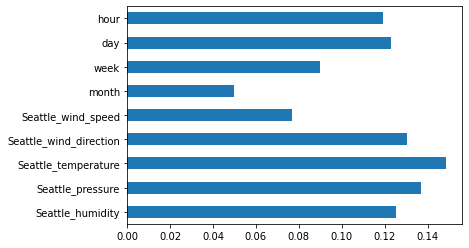

In [21]:
feature_importances = pd.Series(etc.feature_importances_, index=df_final.columns)
feature_importances.plot(kind='barh')
plt.show()

#conclusion: 'wind_speed' and 'month' have little importance so I will try removing them

In [25]:
df_second_round = df_final.drop(['Seattle_wind_speed', 'month'], axis=1)
df_second_round.head()

,Seattle_humidity,Seattle_pressure,Seattle_temperature,Seattle_wind_direction,week,day,hour
1,81.0,1027.0,8.650000,0.0,40,1,13
2,80.0,1027.0,8.647217,2.0,40,1,14
3,80.0,1028.0,8.639833,10.0,40,1,15
4,79.0,1028.0,8.632449,17.0,40,1,16
5,79.0,1029.0,8.625065,24.0,40,1,17


In [26]:
df_second_round.shape

(45238, 7)

In [27]:
df_scaled2 = df_second_round.copy()
df_scaled2 = scale.fit_transform(df_scaled2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_scaled2, y, test_size=0.33)

def model_validator_2(alg):
    cv = cross_val_score(alg, X_train2, y_train2, cv=5)
    print(cv)
    print(cv.mean())

In [32]:
#Random Forest seocnd try:
rf2 = RandomForestClassifier(random_state=1)
model_validator_2(rf2)

#conclusion: not much difference in performance

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.53975586 0.547839   0.53942593 0.54684922 0.54528956]
0.5438319132153143


In [31]:
#Trying without the scaled data, becuase RandomForest does not need normalization/standarization
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_second_round, y, test_size=0.33)

In [51]:
rf3 = RandomForestClassifier(random_state=2)
cv = cross_val_score(rf3, X_train_3, y_train_3, cv=5)
print(cv)
print(cv.mean())

#conclusion: same results

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.53381722 0.53051798 0.54058067 0.52441438 0.53258538]
0.5323831271983488


In [31]:
#Trying with the xgb algorithm, since it also doesent need scaling:
xgb = XGBClassifier()
cv = cross_val_score(xgb, X_train_3, y_train_3, cv=5)
print(cv)
print(cv.mean())

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.48845266 0.48713296 0.49505114 0.49967008 0.49397789]
0.49285694417325754


In [60]:
#Hyperparameter tuning second attempt:

rf_param_2 = RandomForestClassifier(random_state=1)
gscv_2 = GridSearchCV(rf_param_2, param_grid = param_grid, cv=3, verbose = True, n_jobs = 4)

df_grid_search = df_second_round.iloc[0:int(len(df_second_round)/2),:] #hyperparametertuning on only half the dataset to save time
y_grid_search = y.iloc[0:int(len(y)/2)]

gscv_2.fit(df_grid_search, y_grid_search) 
print(gscv_2.best_params_)
print(gscv_2.best_score_)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 13.5min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 30.6min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 60.6min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 84.6min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 133.1min
[Parallel(n_jobs=4)]: Done 2700 out of 2700 | elapsed: 153.8min finished


{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 662}
0.3180091112422301


In [27]:
#testing the rf-algorithm with the optimal parameters
rf = RandomForestClassifier(bootstrap=True, max_depth=5, max_features='auto', min_samples_leaf=1, min_samples_split=10, n_estimators=680, random_state=42)

cv = cross_val_score(rf, X_train_3, y_train_3, cv=4)
print(cv)
print(cv.mean())

#conlusion: It is clear that the model overfitted

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


[0.36579572 0.36439224 0.36689983 0.37442259]
0.3678775968152149


In [ ]:
#
#
#
#
#
#
#

In [52]:
#visualizing the confusion matrix for a better understanding
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(random_state=1)
rf.fit(df_second_round, y)

y_pred = rf.predict(df_second_round)

cf_matrix = confusion_matrix(y, y_pred)

In [47]:
cf_matrix

array([[12796,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,  2115,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,  2875,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,  4659,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,     0,  6175,     0,     0,

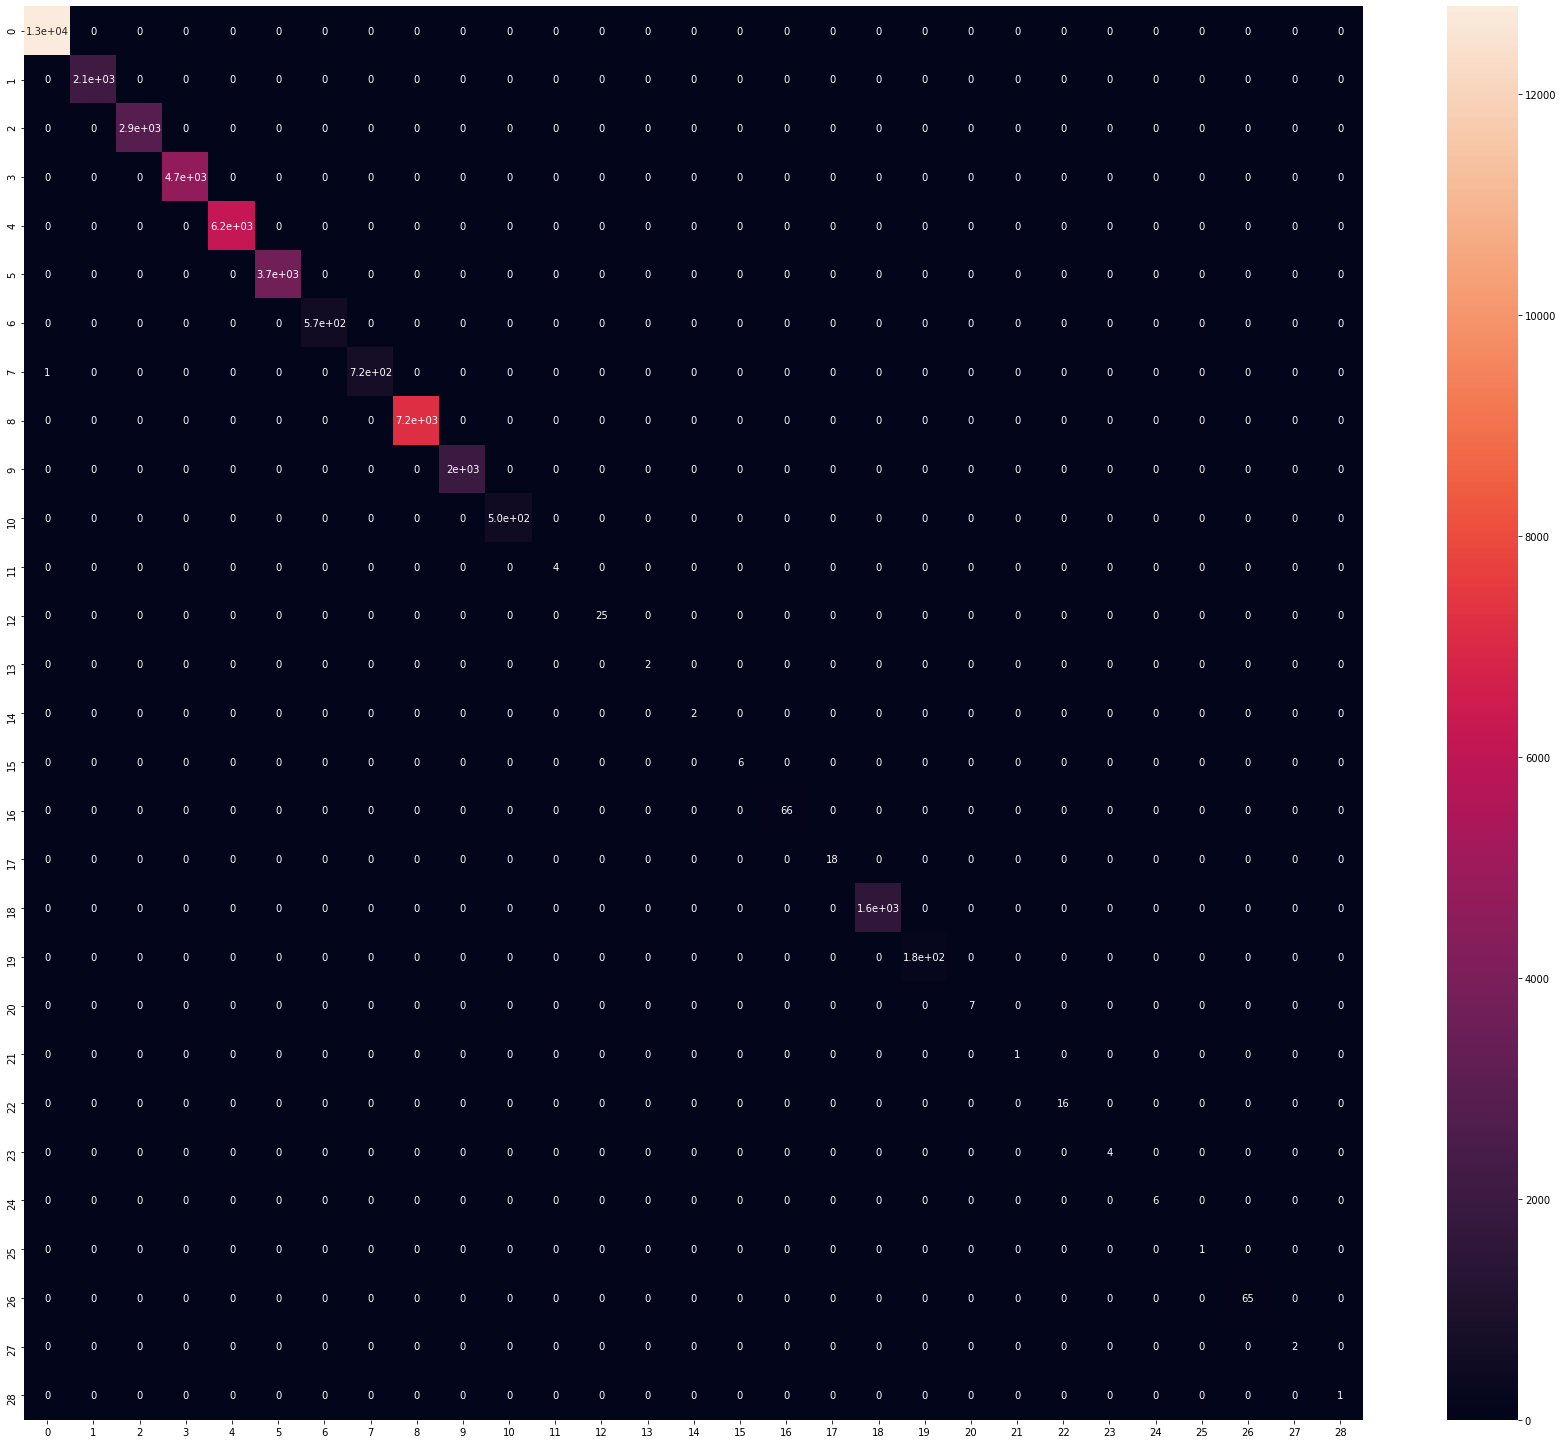

In [51]:
plt.figure(figsize = (30,26))
sns.heatmap(cf_matrix, annot=True)

-> A little bit hard to interperate, but it shows that a lot of the targets are not predicted (we want the targets to    follow a diagonal line). However, this is not really surprising, considering that the distribution of data to each    target is very uneven. Basically the model is fundamentally flawed. A possible option is to only use the data for      the targets that have a lot of data to be trained on.

In [53]:
seattle_df.target.value_counts()
#Perhaps using only the top 9 targets

0     12796
8      7154
4      6175
3      4659
5      3686
2      2875
1      2115
9      1968
18     1616
7       716
6       572
10      505
19      175
16       66
26       65
12       25
17       18
22       16
20        7
15        6
24        6
11        4
23        4
14        2
13        2
27        2
21        1
25        1
28        1
Name: target, dtype: int64

In [33]:
seattle_df.Seattle_weather_description.value_counts()

sky is clear                    12796
light rain                       7154
overcast clouds                  6175
broken clouds                    4659
mist                             3686
scattered clouds                 2875
few clouds                       2115
moderate rain                    1968
light intensity drizzle          1616
fog                               716
haze                              572
heavy intensity rain              505
smoke                             175
light snow                         66
light intensity shower rain        65
proximity thunderstorm             25
very heavy rain                    18
drizzle                            16
thunderstorm                        7
heavy intensity drizzle             6
thunderstorm with light rain        6
heavy snow                          4
snow                                4
thunderstorm with heavy rain        2
shower rain                         2
thunderstorm with rain              2
squalls     

In [30]:
#
#
#
#
#
#
#

In [28]:
#Removing targets with too little data
seattle_df.groupby('target').head()

,datetime,Seattle_humidity,Seattle_pressure,Seattle_temperature,Seattle_weather_description,Seattle_wind_direction,Seattle_wind_speed,target,month,week,day,hour
1,2012-10-01 13:00:00,81.0,1027.0,8.650000,sky is clear,0.0,0.0,0,10,40,1,13
2,2012-10-01 14:00:00,80.0,1027.0,8.647217,sky is clear,2.0,0.0,0,10,40,1,14
3,2012-10-01 15:00:00,80.0,1028.0,8.639833,sky is clear,10.0,0.0,0,10,40,1,15
4,2012-10-01 16:00:00,79.0,1028.0,8.632449,sky is clear,17.0,0.0,0,10,40,1,16
5,2012-10-01 17:00:00,79.0,1029.0,8.625065,sky is clear,24.0,0.0,0,10,40,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...
39899,2017-04-20 23:00:00,67.0,1025.0,12.230000,shower rain,210.0,4.0,27,4,16,20,23
40241,2017-05-05 05:00:00,100.0,1007.0,16.500000,thunderstorm with light rain,30.0,1.0,15,5,18,5,5
40392,2017-05-11 12:00:00,93.0,1011.0,11.990000,shower rain,120.0,2.0,27,5,19,11,12
43808,2017-09-30 20:00:00,63.0,1019.0,15.990000,heavy intensity shower rain,180.0,4.0,28,9,39,30,20


In [28]:
#Locating all the targets with more than 1900 datapoints
included_targets = [i for i in seattle_df.target.value_counts().loc[lambda x: x > 1900].index[:]]
included_targets

[0, 8, 4, 3, 5, 2, 1, 9]

In [29]:
new_df = seattle_df.loc[seattle_df.target.isin(included_targets)]
new_df.head()

,datetime,Seattle_humidity,Seattle_pressure,Seattle_temperature,Seattle_weather_description,Seattle_wind_direction,Seattle_wind_speed,target,month,week,day,hour
1,2012-10-01 13:00:00,81.0,1027.0,8.650000,sky is clear,0.0,0.0,0,10,40,1,13
2,2012-10-01 14:00:00,80.0,1027.0,8.647217,sky is clear,2.0,0.0,0,10,40,1,14
3,2012-10-01 15:00:00,80.0,1028.0,8.639833,sky is clear,10.0,0.0,0,10,40,1,15
4,2012-10-01 16:00:00,79.0,1028.0,8.632449,sky is clear,17.0,0.0,0,10,40,1,16
5,2012-10-01 17:00:00,79.0,1029.0,8.625065,sky is clear,24.0,0.0,0,10,40,1,17


In [30]:
#renaming the targets:
#new_df['target'] = new_df.target.map({0:0,8:1,4:2,3:3,5:4,2:5,1:6,9:7})
#new_df.target.head(15)

for x, y in enumerate(included_targets):
    #print(x, y)
    new_df.loc[new_df.target == y, 'target'] = x + 100 #have to increase the numbers so there is no overlap 

#removing the overlap precausion (-100)
new_df['target'] = new_df.target.map(lambda x: x - 100)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-30-35ea2b75b2f6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = new_df.target.map(lambda x: x - 100)


In [31]:
new_df.target.value_counts()

0    12796
1     7154
2     6175
3     4659
4     3686
5     2875
6     2115
7     1968
Name: target, dtype: int64

In [32]:
new_df_train = new_df.drop(['Seattle_weather_description', 'datetime', 'target'], axis=1)
print(new_df_train.head())

new_y = new_df['target']
print(new_df_train.shape)
print(new_y.shape)

   Seattle_humidity  Seattle_pressure  Seattle_temperature  \
1              81.0            1027.0             8.650000   
2              80.0            1027.0             8.647217   
3              80.0            1028.0             8.639833   
4              79.0            1028.0             8.632449   
5              79.0            1029.0             8.625065   

   Seattle_wind_direction  Seattle_wind_speed  month  week  day  hour  
1                     0.0                 0.0     10    40    1    13  
2                     2.0                 0.0     10    40    1    14  
3                    10.0                 0.0     10    40    1    15  
4                    17.0                 0.0     10    40    1    16  
5                    24.0                 0.0     10    40    1    17  
(41428, 9)
(41428,)


In [33]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_df_train, new_y, test_size=0.33)
def model_validator(alg, xt, yt): #algorithm, X_train, y_train
    cv = cross_val_score(alg, xt, yt, cv=5)
    print(cv)
    print(cv.mean())
    
from sklearn.metrics import accuracy_score
def model_accuracy(alg, xtrain, xtest, ytrain, ytest):
    alg.fit(xtrain, ytrain)
    ypred = alg.predict(xtest)
    print('accuracy_score: ', accuracy_score(ytest, ypred))

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
model_validator(rf, X_train_new, y_train_new)
model_accuracy(rf, X_train_new, X_test_new, y_train_new, y_test_new)

#conclusion: slightly better results

[0.57006484 0.57467123 0.58421906 0.56638444 0.58151684]
0.575371282117042
accuracy_score:  0.5925248683440608


In [61]:
xgb = XGBClassifier()
model_validator(xgb, X_train_new, y_train_new)

[0.54088617 0.53593947 0.53467844 0.53269681 0.53053504]
0.5349471847895101


In [80]:
from sklearn.multiclass import OneVsRestClassifier
svc = OneVsRestClassifier(SVC(probability=True))
model_validator(svc, X_train_new, y_train_new)

[0.32438761 0.33543506 0.36678076 0.30697172 0.32354531]
0.3314240897997453


In [117]:
knn = KNeighborsClassifier()
model_validator(knn, X_train_new, y_train_new)

[0.42903458 0.44208251 0.44334354 0.44874797 0.43974059]
0.44058983842254973


In [38]:
#feature importances again:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train_new, y_train_new)

ExtraTreesClassifier()

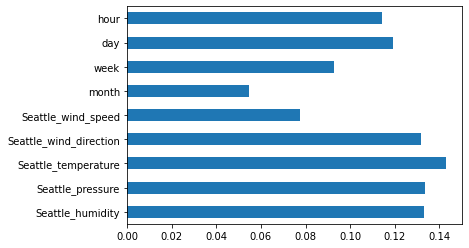

In [39]:
feature_importances = pd.Series(etc.feature_importances_, index=new_df_train.columns)
feature_importances.plot(kind='barh')
plt.show()

#conclusion: pritty similar results compared to the previous dataset - but most features preformed a little bit better

In [40]:
#
#
#
#
#
#
#

In [35]:
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(RandomForestClassifier(random_state=2))
model_validator(clf, X_train_new, y_train_new)

[0.57744957 0.57323005 0.57377049 0.58584039 0.58115655]
0.5782894091310494


In [36]:
from sklearn.multiclass import OneVsOneClassifier

clf = OneVsOneClassifier(RandomForestClassifier(random_state=2))
model_validator(clf, X_train_new, y_train_new)

[0.5625     0.56728517 0.56224104 0.57449108 0.5651234 ]
0.5663281390740407


In [ ]:
#
#
#
#
#
#
#

In [34]:
#Will try test the data by only dropping month, then by dropping month, wind_speed and week - The model is pretty overfit so i probably need none of them
new_df_2 = new_df_train.drop(['month'], axis = 1)
X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(new_df_2, new_y, test_size=0.33)
y_train_new2.shape

(27756,)

In [102]:
rf = RandomForestClassifier(random_state=1)
model_validator(rf, X_train_new2, y_train_new2)

[0.56051873 0.57323005 0.57160872 0.57773374 0.57359034]
0.5713363171056751


In [74]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

y = label_binarize(new_y, classes=[0,1,2])
n_classes = 3


# classifier
clf = OneVsRestClassifier(RandomForestClassifier(random_state=0))
y_score = clf.fit(X_train_new2, y_train_new2)
y_score = y_score.predict_proba(X_test_new2)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    a = y_test_new2.iloc[i]
    b = y_score[:, i]
    fpr[i], tpr[i], _ = roc_curve(a, b)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
#tried to create a ROC curve

TypeError: Singleton array 3 cannot be considered a valid collection.

In [38]:
#since the models overfit so much, i will try to half the data
df_half = new_df.iloc[int(len(new_df)/2):(len(new_df)-1), :]

In [39]:
df_half.head()

,datetime,Seattle_humidity,Seattle_pressure,Seattle_temperature,Seattle_weather_description,Seattle_wind_direction,Seattle_wind_speed,target,month,week,day,hour
21572,2015-03-19 08:00:00,90.0,1036.0,6.746667,few clouds,153.0,1.0,6,3,12,19,8
21573,2015-03-19 09:00:00,89.0,1036.0,6.664000,scattered clouds,156.0,1.0,5,3,12,19,9
21574,2015-03-19 10:00:00,90.0,1036.0,6.198667,scattered clouds,138.0,1.0,5,3,12,19,10
21575,2015-03-19 11:00:00,90.0,1035.0,6.020333,scattered clouds,136.0,1.0,5,3,12,19,11
21576,2015-03-19 12:00:00,88.0,1035.0,6.382500,scattered clouds,144.0,1.0,5,3,12,19,12


In [40]:
y_half = df_half['target']
df_half.drop(['Seattle_weather_description', 'datetime', 'target'], axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
df_half.head()

,Seattle_humidity,Seattle_pressure,Seattle_temperature,Seattle_wind_direction,Seattle_wind_speed,month,week,day,hour
21572,90.0,1036.0,6.746667,153.0,1.0,3,12,19,8
21573,89.0,1036.0,6.664000,156.0,1.0,3,12,19,9
21574,90.0,1036.0,6.198667,138.0,1.0,3,12,19,10
21575,90.0,1035.0,6.020333,136.0,1.0,3,12,19,11
21576,88.0,1035.0,6.382500,144.0,1.0,3,12,19,12


In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_half, y_half, test_size=0.33)

In [104]:
rf = RandomForestClassifier(random_state=1)
model_validator(rf, X_train, y_train)
#Hmmmmm

[0.5471902  0.54971182 0.55891892 0.55927928 0.54774775]
0.5525695926474026


In [49]:
#trying the xgboost algorithm with ovr
xgb = OneVsRestClassifier(XGBClassifier())
model_validator(xgb, X_train_new2, y_train_new2)

[0.53530259 0.545127   0.54945055 0.5534138  0.53936228]
0.5445312447273045


In [40]:
#
#
#
#
#The labels are heavely imbalanced, so we have to balance them:

In [68]:
#Balancing the data using SMOTE oversampling technique
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(new_df_train, new_y)

In [69]:
print("old: ", new_df_train.shape)
print("new: ", X_resampled.shape)

old:  (41428, 9)
new:  (102368, 9)


In [70]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resampled, y_resampled, test_size=0.33)

In [49]:
rf = RandomForestClassifier(random_state=1)
model_validator(rf, X_train_res, y_train_res)

#WOW, huge increase!

[0.76614667 0.77371145 0.76314063 0.76700445 0.75716264]
0.7654331683798408


In [50]:
xgb = XGBClassifier()
model_validator(xgb, X_train_res, y_train_res)

[0.59826505 0.60960851 0.5994751  0.59983962 0.59233068]
0.5999037943420105


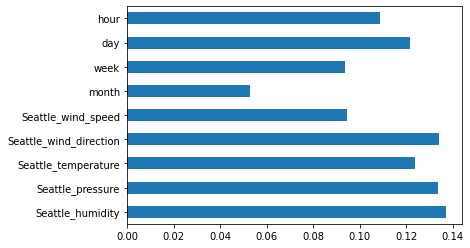

In [51]:
#Feature importances with the new balanced data
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train_res, y_train_res)

feature_importances = pd.Series(etc.feature_importances_, index=new_df_train.columns)
feature_importances.plot(kind='barh')
plt.show()

In [71]:
#removing month again (removing week, and wind_speed decreases the performance)
X_resampled_2 = X_resampled.drop(['month'], axis=1)
X_train_res_2, X_test_res_2, y_train_res_2, y_test_res_2 = train_test_split(X_resampled_2, y_resampled, test_size=0.33)
X_resampled_2.shape

(102368, 8)

In [57]:
rf = RandomForestClassifier(random_state=1)
model_validator(rf, X_train_res_2, y_train_res_2)
#conclusion: slightly better result

[0.77103076 0.76802508 0.76736896 0.77312824 0.77327404]
0.770565414729715


In [61]:
#
#
#
#
#
#checking the confusion matrix for the new, balanced, dataset

In [64]:
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled_2, y_resampled)
y_pred = rf.predict(X_resampled_2)

cf_matrix = confusion_matrix(y_resampled, y_pred)

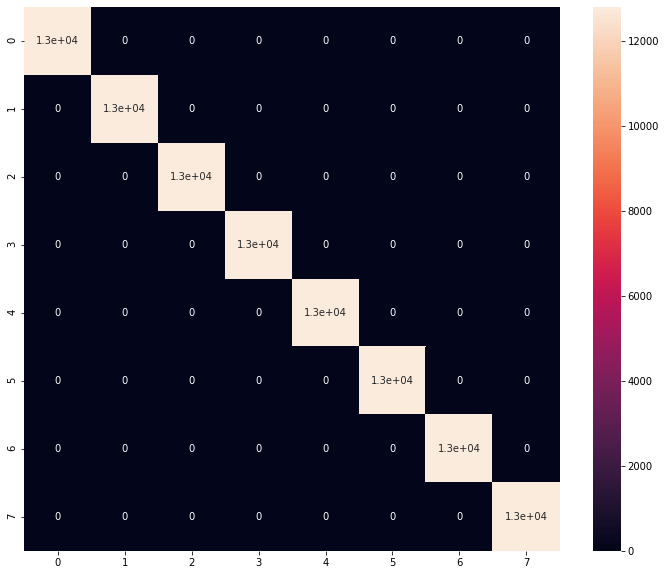

In [68]:
plt.figure(figsize = (12,10))
sns.heatmap(cf_matrix, annot=True)
#conclusion: perfectly balanced - Might try to balance all the targets, although the dataset would become huge

In [76]:
int(1.3e+04)

13000

In [77]:
#
#
#
#
#Trying to fix the imbalance by undersampling instead of oversampling - this is usefull if the dataset is very big
#(I dont know how big it would need to be though, so I will try and see)

In [72]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_undersampled, y_undersampled = nm.fit_sample(new_df_train, new_y)

In [73]:
print(X_undersampled.shape)
print(new_df_train.shape)

(15744, 9)
(41428, 9)


In [74]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_undersampled, y_undersampled)

In [89]:
rf = RandomForestClassifier(random_state=1)
model_validator(rf, X_train_us, y_train_us)
#Conclusion: Oversampling was definetly a better approach than undersampling

[0.53132938 0.53471634 0.55419136 0.52520119 0.53748412]
0.5365844780104012


In [90]:
#
#
#
#
#Combining oversampling and undersampling:

In [34]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_smk, y_smk = smk.fit_sample(new_df_train, new_y)

In [35]:
print(X_smk.shape)
print(new_df_train.shape)

(99680, 9)
(41428, 9)


In [36]:
X_train_smk, X_test_smk, y_train_smk, y_test_smk = train_test_split(X_smk, y_smk)

In [95]:
rf = RandomForestClassifier(random_state=1)
model_validator(rf, X_train_smk, y_train_smk)
#1.5% accuracy increase vs oversampling

[0.78551364 0.78417603 0.78337346 0.79019529 0.79059658]
0.7867710005350455


In [37]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(RandomForestClassifier(random_state=1))
model_validator(ovr, X_train_smk, y_train_smk)
#this is the best result and I will use this model for deployment

[0.79320492 0.79340556 0.78939272 0.79594703 0.79266988]
0.7929240235420011


In [38]:
xgb = XGBClassifier(random_state=1)
model_validator(xgb, X_train_smk, y_train_smk)

[0.61336276 0.61282772 0.61851257 0.61142322 0.61189139]
0.6136035313001604


In [57]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train_smk, y_train_smk)
y_pred_smk = rf.predict(X_test_smk)

from sklearn.metrics import accuracy_score
print('accuracy: ', accuracy_score(y_test_smk, y_pred_smk))

accuracy:  0.8165329052969502


In [48]:
#trying to balance all the targets on a previous dataset and try it:
y_balance = seattle_df['target']
df_balance = seattle_df.drop(['datetime', 'Seattle_weather_description', 'target'], axis = 1)
print(y_balance.shape)
print(df_balance.shape)

(45238,)
(45238, 9)


In [52]:
#I have to use randomoversampler because some of the classes/targets have basically 0 datapoints, so the distribution
#is so uneven that the SMOTETek algorithm doesent work with it
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()
X_total_r, y_total_r = os.fit_sample(df_balance, y_balance)
print(df_balance.shape)
print(X_total_smk.shape)
#Huge dataset

(45238, 9)
(371084, 9)


In [54]:
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X_total_r, y_total_r, test_size=0.33)
rf = RandomForestClassifier(random_state=1)
model_validator(rf, X_train_total, y_train_total)

#LOL, great accuracy, however it is a fake result

[0.96619475 0.96651584 0.96842634 0.96629462 0.96639517]
0.9667653446164014


In [88]:
#
#
#
#
#
#
#

In [ ]:
#Parametertuning with the SMOTEtomek balanced data

In [87]:
n_estimators = [int(x) for x in np.linspace(start=400, stop=750, num=5)]
max_depth = [5,10,50,75,100]
min_samples_split = [1,5,10]
min_samples_leaf = [1, 5, 10]
bootstrap = [True, False]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [ ]:
rf = RandomForestClassifier(random_state=1)
rnd_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, random_state=0)
model_tuner(rnd_search, X_smk, y_smk)
#I used a different computer with more computing power for this, but the model did not improve in performance after
#several iterations of parametertuning 

In [39]:
#
#
#
#
#
#

In [44]:
#Model deployment using pickle
import pickle

final_model = OneVsRestClassifier(RandomForestClassifier(random_state=1))
final_model.fit(X_train_smk, y_train_smk)

file = open('weather_model.pkl', 'wb')
pickle.dump(final_model, file)

In [48]:
with open('weather_model.pkl', 'rb') as file:  
    pk_model = pickle.load(file)